## ANALYSING DATA SCIENCE JOB MARKET 
This project is to help job seekers better understand data-driven job market in the UK. 

The dataset included 595 data-driven jobs around the UK from Reed Job board which were posted from late December 2020 to early February 2021. 
Special thanks to 
Matt Clarke who shared the dataset. Here is the linkt to the dataset https://www.kaggle.com/devario/uk-data-science-jobs-dataset  

Information scraped are Job Title, Date Posted, Date Ending, Advertiser, Location, City, Salary, Salary Min, Salary Max, Description. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 400


In [3]:
UKjobs=pd.read_csv(r'/Users/trinhthivyphuong/Documents/BA - Programming/BEMM458-main/data/deduped-jobs.csv')


In [4]:
UKjobs.head(1)

,reference,title,date_posted,date_ending,advertiser,location,city,country,salary,salary_min,salary_max,salary_frequency,salary_currency,description
0,41715769,Senior Customer Insight Analytics Manager,11/01/2021,2021-02-22T23:55:00.0000000,Harnham,Lancashire,Manchester,GB,10000,10000,200000,YEAR,NaN,Apply now\nSenior Customer Insight Analytics Manager\nManchester\nCompetitive salary depending on experience\nA global sports with a huge fan base are seeking to expand their analytics function. This brand have millions of customers globally and are one of the well known giants in the sporting industry. They are looking for a new leader of their Analytics & Insight function to be manage a high...


In [5]:
UKjobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reference         595 non-null    int64  
 1   title             595 non-null    object 
 2   date_posted       595 non-null    object 
 3   date_ending       595 non-null    object 
 4   advertiser        595 non-null    object 
 5   location          595 non-null    object 
 6   city              595 non-null    object 
 7   country           595 non-null    object 
 8   salary            595 non-null    int64  
 9   salary_min        595 non-null    int64  
 10  salary_max        595 non-null    int64  
 11  salary_frequency  595 non-null    object 
 12  salary_currency   0 non-null      float64
 13  description       595 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 65.2+ KB


In [6]:
UKjobs[['salary','salary_min','salary_max']].describe()

,salary,salary_min,salary_max
count,595.000000,595.000000,595.000000
mean,57189.033613,57189.033613,72737.552941
std,21715.541218,21715.541218,37923.735008
min,10000.000000,10000.000000,18000.000000
25%,41000.000000,41000.000000,55000.000000
50%,55000.000000,55000.000000,70000.000000
75%,70000.000000,70000.000000,85000.000000
max,150000.000000,150000.000000,750000.000000


## 1. Job Level

### 1.1 Analytical Level

In [7]:
# find keywords in job titles
DSAA='Data Scientist|Economist|Data Engineer|Biostatistician|Statistician|Financial Quantitative Analyst|Scientist|Engineer'

filterDSAA = UKjobs['title'].str.contains(DSAA)

UKjobs['Analytical Level']=UKjobs['title'].str.contains(DSAA)
#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'DSAA', False: 'Non_DSAA'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))
UKjobs.groupby('Analytical Level')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Analytical Level,,,,,,,,
DSAA,311.0,59513.485531,19028.398519,22000.0,45000.0,60000.0,70000.0,150000.0
Non_DSAA,284.0,54643.595070,24098.164918,10000.0,40000.0,50000.0,65000.0,150000.0


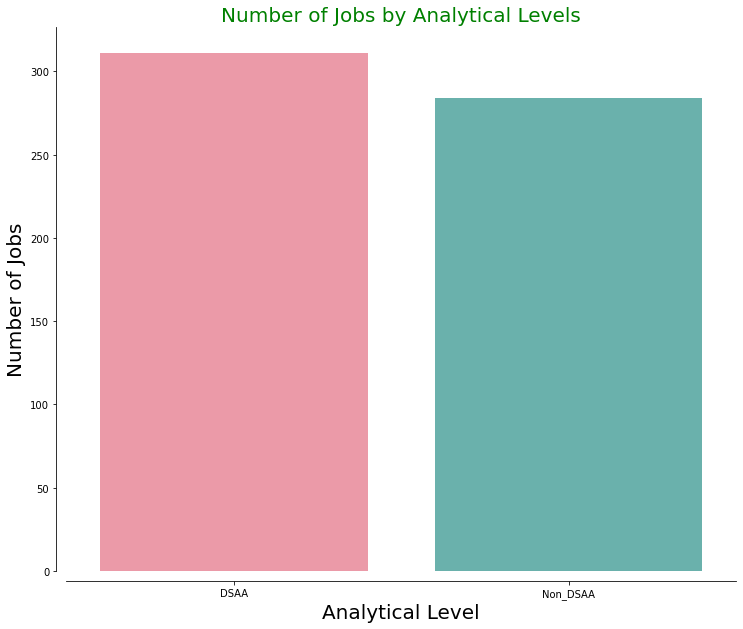

In [8]:
# plot the result 
Analytical_count  = UKjobs['Analytical Level'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(Analytical_count.index, Analytical_count.values, alpha=0.8,palette='husl')
plt.title('Number of Jobs by Analytical Levels', fontsize=20, color='Green')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('Analytical Level', fontsize=20)

sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Analytical Levels.jpg')

plt.show()

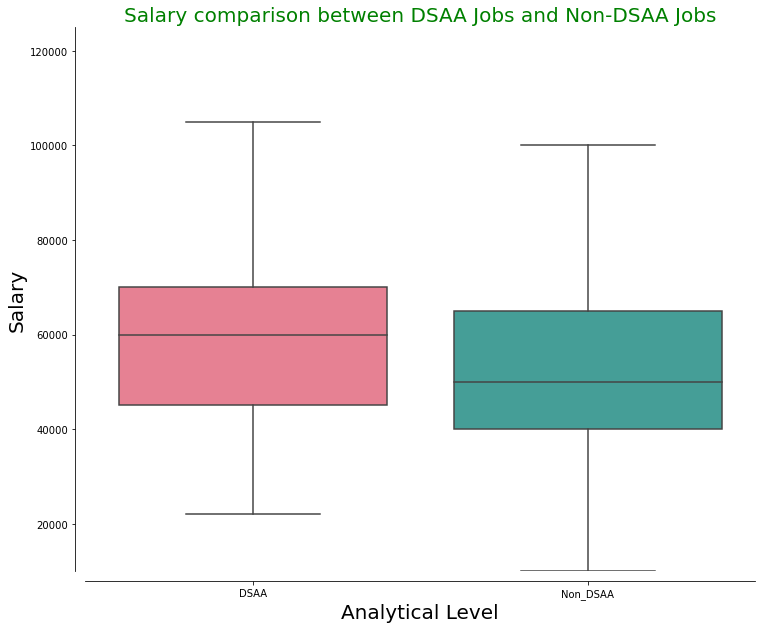

In [9]:
# plot the salary range based on Analytical Level

fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Analytical Level',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='husl',order=['DSAA','Non_DSAA'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Analytical Level", fontsize=20)
ax.set_title("Salary comparison between DSAA Jobs and Non-DSAA Jobs", fontsize=20, color='Green')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between DSAA Jobs and Non-DSAA Jobs.jpg')
plt.show()

### 1.2 Experience Level

In [10]:
# find entry-level jobs 
Entry_Level='Graduate|Intern|Junior|Associate|Assistant|Executive|entry|Entry|generalist|graduate|intern|junior'
filterG = UKjobs['title'].str.contains(Entry_Level)
UKjobs['Entry_Level']=UKjobs['title'].str.contains(Entry_Level)


#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'Entry_Level', False: 'Non_Entry_Level'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby('Entry_Level')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Entry_Level,,,,,,,,
Entry_Level,15.0,27133.333333,6127.999751,18000.0,22500.0,27000.0,30000.0,40000.0
Non_Entry_Level,580.0,57966.336207,21421.145273,10000.0,45000.0,55000.0,70000.0,150000.0


In [11]:
# find senior jobs 
Highly_Experienced='Manager|Senior|Lead|Director|Head|CTO|manager|director|lead|cto|head'

filterM = UKjobs['title'].str.contains(Highly_Experienced)
UKjobs[filterM].head(2)
UKjobs['Experienced_Level']=UKjobs['title'].str.contains(Highly_Experienced)


#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'Highly_Experienced', False: 'Non_Highly_Experienced'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))
UKjobs.groupby(['Experienced_Level'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Experienced_Level,,,,,,,,
Highly_Experienced,277.0,66356.389892,22644.399223,10000.0,50000.0,65000.0,80000.0,150000.0
Non_Highly_Experienced,318.0,49203.632075,17313.974693,18000.0,40000.0,45000.0,60000.0,125000.0


In [12]:
# create a column for all Experience Level
UKjobs.loc[(UKjobs['Entry_Level'] == 'Entry_Level') & (UKjobs['Experienced_Level'] != 'Highly_Experienced'), 'Experience Level'] = 'Entry' 
UKjobs.loc[(UKjobs['Entry_Level'] != 'Entry_Level') & (UKjobs['Experienced_Level'] == 'Highly_Experienced'), 'Experience Level'] = 'Senior or above'
UKjobs.loc[(UKjobs['Entry_Level'] != 'Entry_Level') & (UKjobs['Experienced_Level'] != 'Highly_Experienced'), 'Experience Level'] = 'Experienced'  


In [13]:
UKjobs.groupby(['Experience Level'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience Level,,,,,,,,
Entry,15.0,27133.333333,6127.999751,18000.0,22500.0,27000.0,30000.0,40000.0
Experienced,303.0,50296.221122,16956.738683,18000.0,40000.0,50000.0,60000.0,125000.0
Senior or above,277.0,66356.389892,22644.399223,10000.0,50000.0,65000.0,80000.0,150000.0


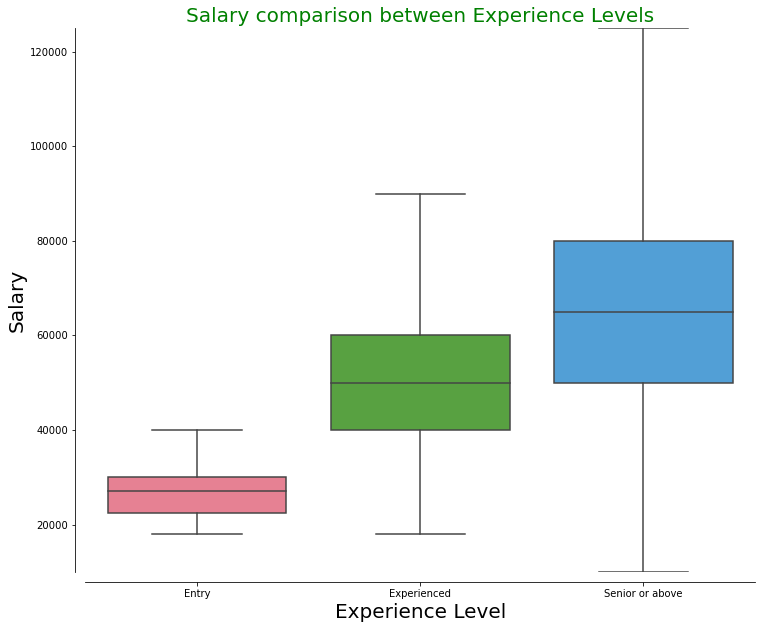

In [14]:
# plot the Salary range based on Experience Level
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='husl', order=['Entry','Experienced','Senior or above'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Salary comparison between Experience Levels", fontsize=20, color='Green')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between Experience Levels.jpg')
plt.show()

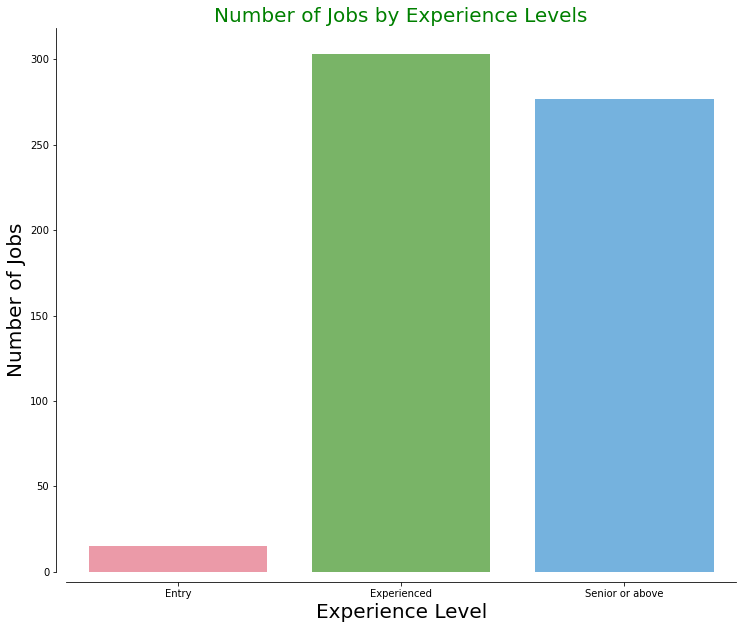

In [15]:
# plot the number of jobs in different experience levels

experience_count  = UKjobs['Experience Level'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(experience_count.index, experience_count.values, alpha=0.8,palette='husl',order=['Entry','Experienced','Senior or above'])
plt.title('Number of Jobs by Experience Levels', fontsize=20, color='Green')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('Experience Level', fontsize=20)
sns.despine(offset=10)
plt.savefig('Figure/Number of jobs by Experience Levels.jpg')
plt.show()

### 1.3 Salary comparison between Analytical Level and Experience Level 

In [16]:
UKjobs.groupby(['Experience Level','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Experience Level Analytical Level                                               
Entry            DSAA                7.0  28714.285714   5707.138387  22000.0   
                 Non_DSAA            8.0  25750.000000   6519.202405  18000.0   
Experienced      DSAA              177.0  54239.491525  16695.537314  23000.0   
                 Non_DSAA          126.0  44756.865079  15787.961182  18000.0   
Senior or above  DSAA              127.0  68561.448819  18045.493099  38000.0   
                 Non_DSAA          150.0  64489.440000  25822.476075  10000.0   

                                       25%      50%      75%       max  
Experience Level Analytical Level                                       
Entry            DSAA              26000.0  27000.0  30000.0   40000.0  
                 Non_DSAA          20000.0  25500.0  29500.0   35000.0  
Experienced      DSAA              45000.0  50000.0  60000.0  125000.0  
                 Non_DSAA          35000.0  45000.0  50000.0  100000.0  
Senior or above  DSAA              55000.0  70000.0  80000.0  150000.0  
                 Non_DSAA          45000.0  60000.0  80000.0  150000.0

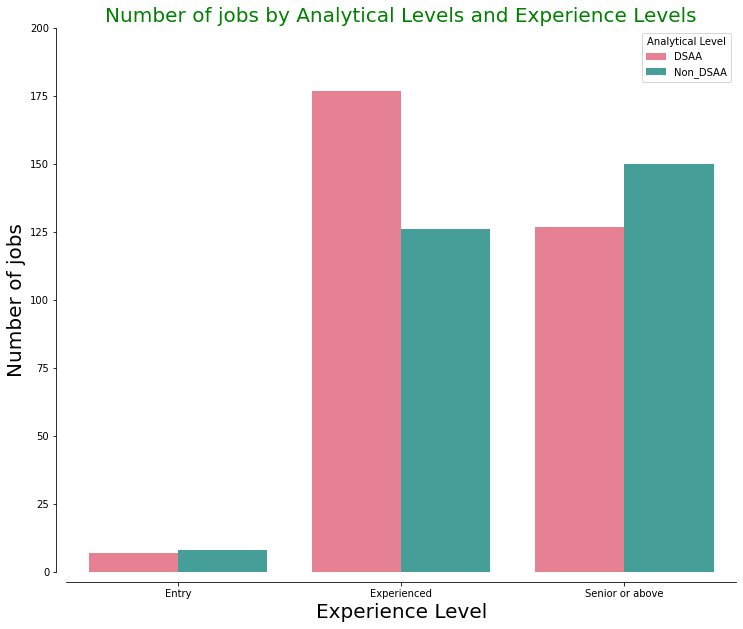

In [17]:
# plot number of jobs divided by Analytical Level 
fig, ax = plt.subplots(1, figsize=(12,10))
ax=sns.countplot(x="Experience Level",hue='Analytical Level', data=UKjobs,order=['Entry','Experienced','Senior or above'],hue_order=['DSAA','Non_DSAA'],palette='husl')
ax.set_ylim([0, 200])
ax.set_ylabel("Number of jobs", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Number of jobs by Analytical Levels and Experience Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of jobs by Analytical Levels and Experience Levels.jpg')
plt.show()

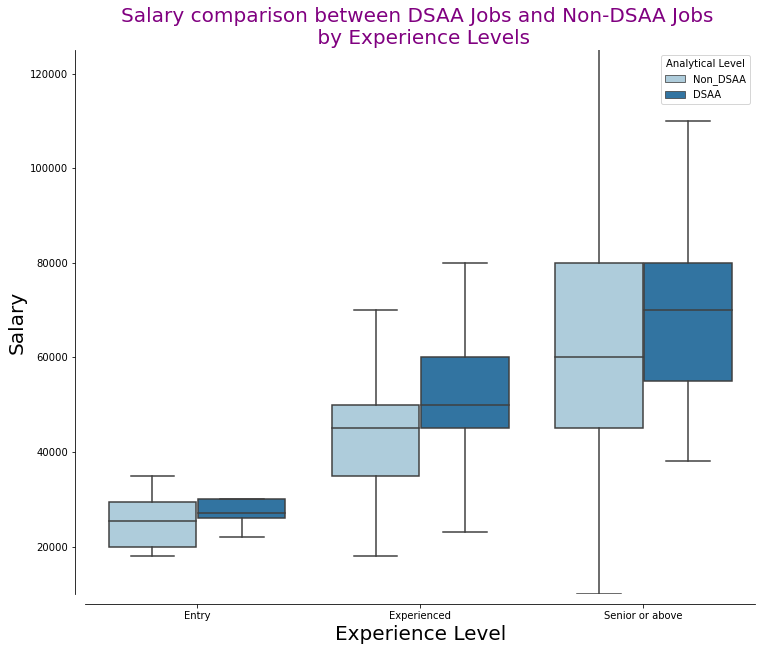

In [18]:
# compare salary range of Analytical Levels and Experience Levels
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    hue='Analytical Level',
    data=UKjobs,
    fliersize=0,
    palette='Paired',order=['Entry','Experienced','Senior or above'], 
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=20)
ax.set_xlabel("Experience Level", fontsize=20)
ax.set_title("Salary comparison between DSAA Jobs and Non-DSAA Jobs \n by Experience Levels", fontsize=20, color='Purple')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between DSAA Jobs and Non-DSAA Jobs \n by Experience Levels.jpg')
plt.show()

## 2. Location

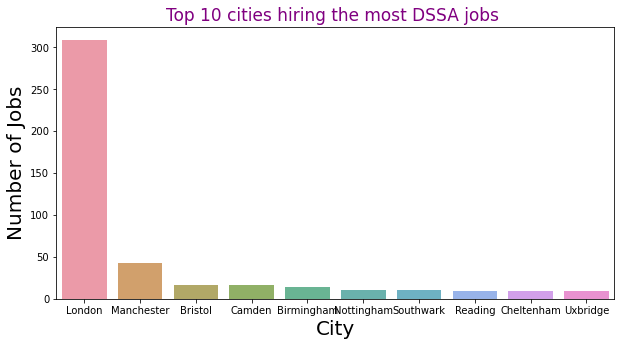

In [19]:
# plot the number of jobs in top 10 cities in the UK
city_count  = UKjobs['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8,palette='husl')
plt.title('Top 10 cities hiring the most DSSA jobs ', fontsize=17, color='Purple')
plt.ylabel('Number of Jobs', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.savefig('Figure/Top 10 cities hiring the most DSSA jobs.jpg')
plt.show()

In [20]:
number=UKjobs.city.value_counts(normalize=False)[:10]
number

London        309
Manchester     43
Bristol        17
Camden         16
Birmingham     14
Nottingham     11
Southwark      11
Reading         9
Cheltenham      9
Uxbridge        9
Name: city, dtype: int64

In [23]:
percent=UKjobs.city.value_counts(normalize=True)[:10]
percent

London        0.519328
Manchester    0.072269
Bristol       0.028571
Camden        0.026891
Birmingham    0.023529
Southwark     0.018487
Nottingham    0.018487
Reading       0.015126
Cheltenham    0.015126
Uxbridge      0.015126
Name: city, dtype: float64

In [21]:
#add a new column for Capital
UKjobs['Capital']=UKjobs['city']=='London'
#convert a boolean to a string
mask = UKjobs.applymap(type) != bool
d = {True: 'London', False: 'Non-London'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

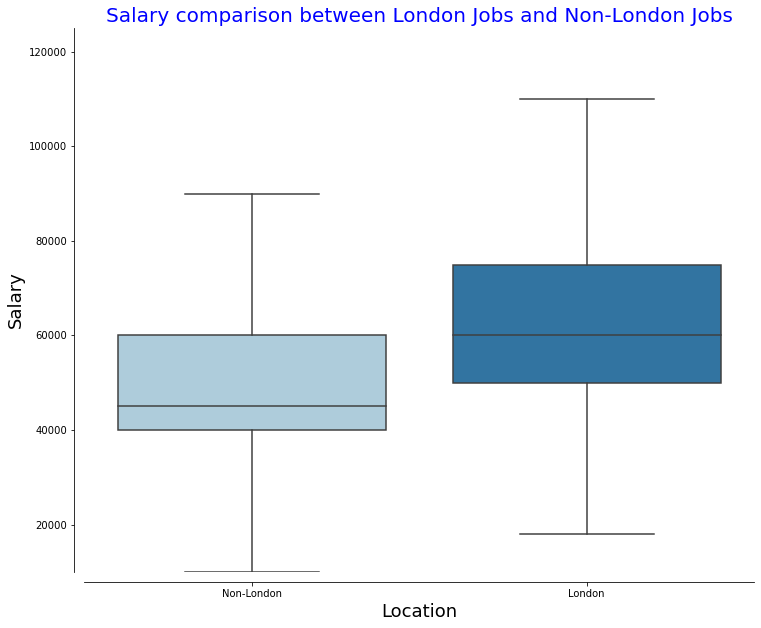

In [22]:
# plot the salary range for jobs in London and outside London
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Capital',
    y='salary',
    data=UKjobs,
    fliersize=0,
    palette='Paired', 
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Location", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs.jpg')
plt.show()

In [23]:
UKjobs.groupby(['Capital','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Capital    Analytical Level                                               
London     DSAA              179.0  65098.044693  20070.281263  22000.0   
           Non_DSAA          130.0  62892.307692  27893.831430  18000.0   
Non-London DSAA              132.0  51940.484848  14459.929119  25000.0   
           Non_DSAA          154.0  47680.396104  17649.728783  10000.0   

                                 25%      50%      75%       max  
Capital    Analytical Level                                       
London     DSAA              50000.0  60000.0  75000.0  150000.0  
           Non_DSAA          45000.0  55000.0  80000.0  150000.0  
Non-London DSAA              40000.0  50000.0  60000.0   85000.0  
           Non_DSAA          35750.0  45000.0  55750.0  100000.0

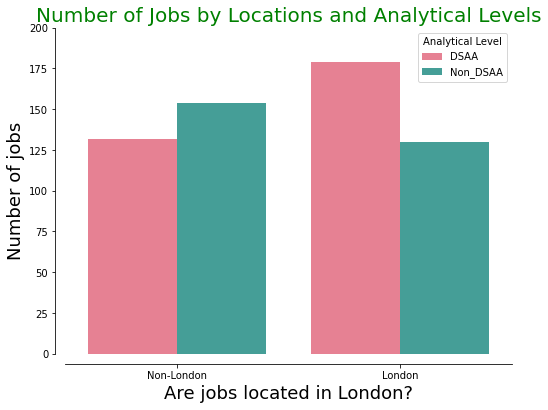

In [24]:
# plot number of jobs divided by Analytical Level 
fig, ax = plt.subplots(1, figsize=(8,6))
ax=sns.countplot(x="Capital",hue='Analytical Level', data=UKjobs,hue_order=['DSAA','Non_DSAA'],palette='husl')
ax.set_ylim([0, 200])
ax.set_ylabel("Number of jobs", fontsize=18)
ax.set_xlabel("Are jobs located in London?", fontsize=18)
ax.set_title("Number of Jobs by Locations and Analytical Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Locations and Analytical Levels.jpg')
plt.show()

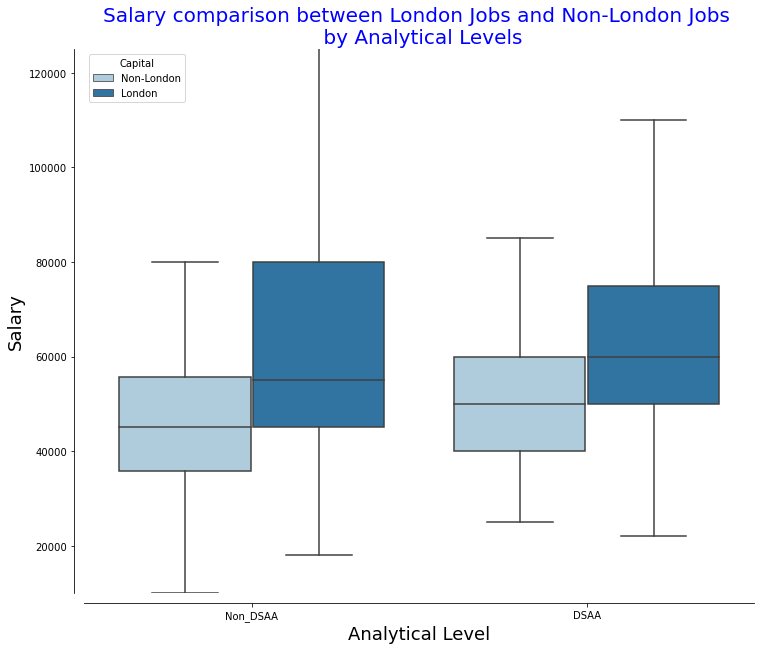

In [26]:
# Plot Salary Range between London Jobs and Non-London Jobs clasified by Analytical Levels

fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Analytical Level',
    y='salary',
    hue='Capital',
    data=UKjobs,
    fliersize=0,
    palette='Paired',
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Analytical Level", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs \n by Analytical Levels", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs \n by Analytical Levels.jpg')
plt.show()

In [27]:
UKjobs.groupby(['Capital','Experience Level'])['salary'].describe()

count          mean           std      min  \
Capital    Experience Level                                               
London     Entry              10.0  28100.000000   6349.978128  18000.0   
           Experienced       134.0  56358.208955  19100.211779  20000.0   
           Senior or above   165.0  72700.303030  23472.919332  28000.0   
Non-London Entry               5.0  25200.000000   5805.170109  20000.0   
           Experienced       169.0  45489.674556  13247.859734  18000.0   
           Senior or above   112.0  57010.446429  17691.174913  10000.0   

                                 25%      50%      75%       max  
Capital    Experience Level                                       
London     Entry             24000.0  28000.0  30000.0   40000.0  
           Experienced       45000.0  55000.0  65000.0  125000.0  
           Senior or above   60000.0  70000.0  80000.0  150000.0  
Non-London Entry             20000.0  25000.0  27000.0   34000.0  
           Experienced       40000.0  45000.0  50000.0   95000.0  
           Senior or above   45000.0  55000.0  70000.0  100000.0

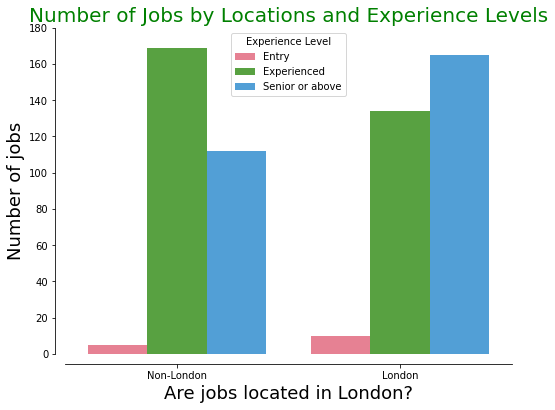

In [28]:
# plot number of jobs divided by Experience Levels

fig, ax = plt.subplots(1, figsize=(8,6))
ax=sns.countplot(x="Capital",hue='Experience Level', data=UKjobs,hue_order=['Entry','Experienced','Senior or above'],palette='husl')
ax.set_ylim([0, 180])
ax.set_ylabel("Number of jobs", fontsize=18)
ax.set_xlabel("Are jobs located in London?", fontsize=18)
ax.set_title("Number of Jobs by Locations and Experience Levels", fontsize=20, color='Green')
sns.despine(offset=10)
plt.savefig('Figure/Number of Jobs by Locations and Experience Levels.jpg')
plt.show()

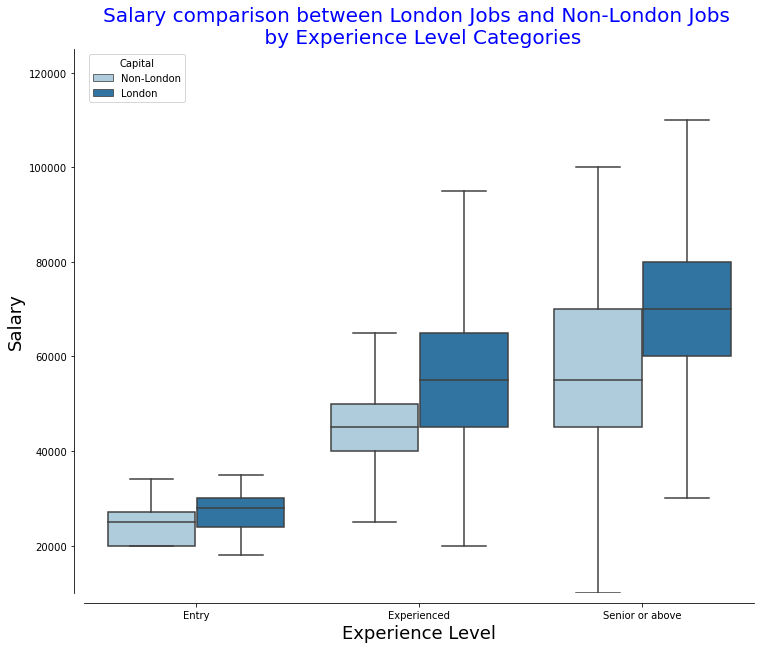

In [29]:
# Plot Salary Range between London Jobs and Non-London Jobs clasified by Experience Levels
fig, ax = plt.subplots(1, figsize=(12,10))

ax = sns.boxplot(
    x='Experience Level',
    y='salary',
    hue='Capital',
    data=UKjobs,
    fliersize=0,
     palette='Paired', order=['Entry','Experienced','Senior or above'],
    ax=ax)

ax.set_ylim([10000, 125000])
ax.set_ylabel("Salary", fontsize=18)
ax.set_xlabel("Experience Level", fontsize=18)
ax.set_title("Salary comparison between London Jobs and Non-London Jobs \n by Experience Level Categories", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.savefig('Figure/Salary comparison between London Jobs and Non-London Jobs by Experience Levels.jpg')
plt.show()

## 3. Skills

### Python

In [32]:
Python='Python|python'

UKjobs['Python'] = UKjobs['description'].str.contains(Python)


mask = UKjobs.applymap(type) != bool
d = {True: 'Python', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Python','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Python Analytical Level                                                        
No     DSAA               73.0  59413.616438  22039.436365  23000.0  45000.0   
       Non_DSAA          142.0  54484.373239  25167.033571  18000.0  40000.0   
Python DSAA              238.0  59544.117647  18056.496752  22000.0  45000.0   
       Non_DSAA          142.0  54802.816901  23067.966010  10000.0  40000.0   

                             50%      75%       max  
Python Analytical Level                              
No     DSAA              60000.0  72550.0  150000.0  
       Non_DSAA          50000.0  68750.0  150000.0  
Python DSAA              60000.0  70000.0  125000.0  
       Non_DSAA          50000.0  65000.0  150000.0

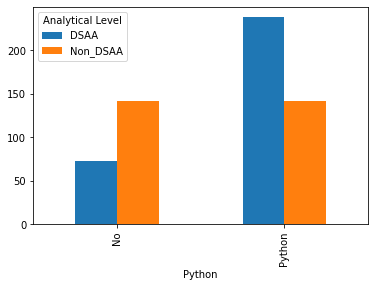

In [34]:
UKjobs.groupby('Analytical Level')['Python'].value_counts().unstack(0).plot.bar()

### R

In [35]:
R=' R | R+. |R+, |R-language|R-programming| R\/ |\/R|R+-|\-R'
UKjobs['R'] = UKjobs['description'].str.contains(R)

mask = UKjobs.applymap(type) != bool
d = {True: 'R', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['R','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
R  Analytical Level                                                        
No DSAA              248.0  61573.362903  19432.352333  22000.0  50000.0   
   Non_DSAA          226.0  54523.964602  23421.400211  18000.0  40000.0   
R  DSAA               63.0  51404.761905  14907.742398  25000.0  40000.0   
   Non_DSAA           58.0  55109.741379  26787.636164  10000.0  40000.0   

                         50%      75%       max  
R  Analytical Level                              
No DSAA              60000.0  75000.0  150000.0  
   Non_DSAA          50000.0  65000.0  150000.0  
R  DSAA              50000.0  60000.0   90000.0  
   Non_DSAA          47500.0  65000.0  150000.0

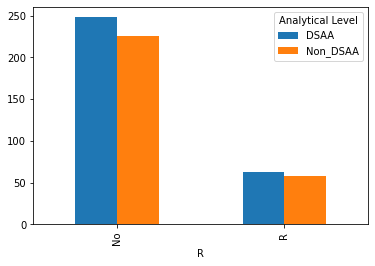

In [36]:
UKjobs.groupby('Analytical Level')['R'].value_counts().unstack(0).plot.bar()

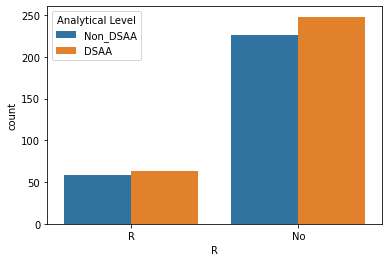

In [37]:
sns.countplot(x="R",hue='Analytical Level', data=UKjobs)


### SQL

In [38]:
SQL='SQL|sql|PostgreSQL|postgreSQL|MySQL|MSSQL|SQLite'
UKjobs['SQL'] = UKjobs['description'].str.contains(SQL)

mask = UKjobs.applymap(type) != bool
d = {True: 'SQL', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['SQL','Analytical Level'])['salary'].describe()


count          mean           std      min      25%  \
SQL Analytical Level                                                        
No  DSAA              129.0  63199.178295  19581.184254  25000.0  50000.0   
    Non_DSAA          156.0  57182.153846  25480.520197  18000.0  40000.0   
SQL DSAA              182.0  56901.098901  18233.025070  22000.0  45000.0   
    Non_DSAA          128.0  51549.726562  22001.941882  10000.0  40000.0   

                          50%      75%       max  
SQL Analytical Level                              
No  DSAA              60000.0  75000.0  150000.0  
    Non_DSAA          52500.0  70000.0  150000.0  
SQL DSAA              55000.0  70000.0  125000.0  
    Non_DSAA          45000.0  60000.0  150000.0

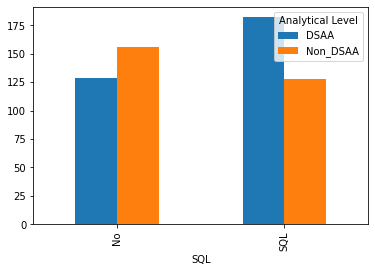

In [39]:
UKjobs.groupby('Analytical Level')['SQL'].value_counts().unstack(0).plot.bar()

### Data Science

In [40]:
Data_Science='Data Science|data science|Data science|data science'
UKjobs['Data_Science'] = UKjobs['description'].str.contains(Data_Science)

mask = UKjobs.applymap(type) != bool
d = {True: 'Data_Science', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Data_Science','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Data_Science Analytical Level                                               
Data_Science DSAA              217.0  59117.004608  20133.891106  22000.0   
             Non_DSAA          231.0  54657.060606  25533.363252  10000.0   
No           DSAA               94.0  60428.765957  16254.439934  30000.0   
             Non_DSAA           53.0  54584.905660  16638.040244  25000.0   

                                   25%      50%      75%       max  
Data_Science Analytical Level                                       
Data_Science DSAA              45000.0  60000.0  70000.0  150000.0  
             Non_DSAA          40000.0  50000.0  70000.0  150000.0  
No           DSAA              50000.0  60000.0  70000.0  110000.0  
             Non_DSAA          45000.0  55000.0  60000.0  100000.0

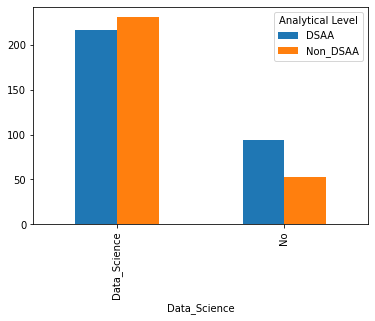

In [41]:
UKjobs.groupby('Analytical Level')['Data_Science'].value_counts().unstack(0).plot.bar()

### Machine Learning

In [42]:
Machine_Learning='Machine learning|machine learning|Machine Learning'
UKjobs['Machine_Learning'] = UKjobs['description'].str.contains(Machine_Learning)

mask = UKjobs.applymap(type) != bool
d = {True: 'Machine_Learning', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Machine_Learning','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Machine_Learning Analytical Level                                               
Machine_Learning DSAA              144.0  59800.375000  18303.487400  25000.0   
                 Non_DSAA           80.0  61587.500000  29070.709845  25000.0   
No               DSAA              167.0  59266.107784  19683.518390  22000.0   
                 Non_DSAA          204.0  51920.495098  21312.901201  10000.0   

                                       25%      50%      75%       max  
Machine_Learning Analytical Level                                       
Machine_Learning DSAA              50000.0  60000.0  70000.0  125000.0  
                 Non_DSAA          40000.0  55500.0  75000.0  150000.0  
No               DSAA              45000.0  60000.0  71275.0  150000.0  
                 Non_DSAA          40000.0  50000.0  60000.0  150000.0

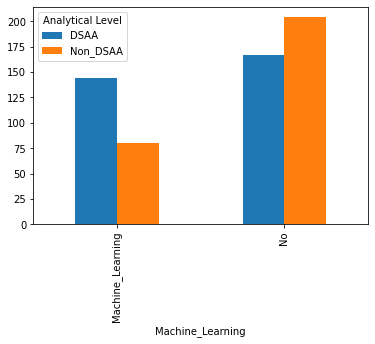

In [43]:
UKjobs.groupby('Analytical Level')['Machine_Learning'].value_counts().unstack(0).plot.bar()

### Visualization

In [44]:
Visualization='Power BI|power bi|Tableau|Visualisation|data viz|visualisation|visualization|Visualization|visuals|plotly|seaborn|matplotlib|Seaborn|Matplotlib|Visuals'
UKjobs['Visualization'] = UKjobs['description'].str.contains(Visualization)

mask = UKjobs.applymap(type) != bool
d = {True: 'Visualization', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Visualization','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Visualization Analytical Level                                               
No            DSAA              266.0  60727.218045  18907.367192  22000.0   
              Non_DSAA          222.0  57209.081081  25838.892810  10000.0   
Visualization DSAA               45.0  52338.977778  18341.554750  25000.0   
              Non_DSAA           62.0  45457.500000  12868.143559  22000.0   

                                    25%      50%      75%       max  
Visualization Analytical Level                                       
No            DSAA              45000.0  60000.0  70000.0  150000.0  
              Non_DSAA          40000.0  50000.0  70000.0  150000.0  
Visualization DSAA              40000.0  50000.0  65000.0  100000.0  
              Non_DSAA          36250.0  45000.0  55000.0   80000.0

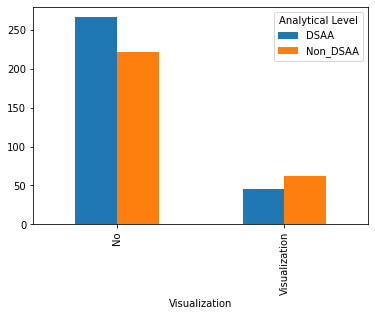

In [40]:
UKjobs.groupby('Analytical Level')['Visualization'].value_counts().unstack(0).plot.bar()

### Research

In [45]:
Research='Research|research'
UKjobs['Research'] = UKjobs['description'].str.contains(Research)

mask = UKjobs.applymap(type) != bool
d = {True: 'Research', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Research','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Research Analytical Level                                               
No       DSAA              262.0  60459.694656  18979.800613  22000.0   
         Non_DSAA          253.0  54388.794466  24344.183773  10000.0   
Research DSAA               49.0  54454.163265  18672.173797  25000.0   
         Non_DSAA           31.0  56723.096774  22247.561753  18000.0   

                               25%      50%      75%       max  
Research Analytical Level                                       
No       DSAA              45000.0  60000.0  70000.0  150000.0  
         Non_DSAA          40000.0  50000.0  65000.0  150000.0  
Research DSAA              40000.0  50000.0  70000.0  110000.0  
         Non_DSAA          40000.0  60000.0  75000.0  100000.0

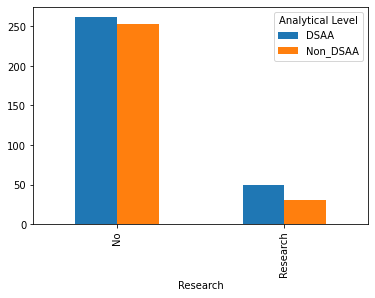

In [46]:
UKjobs.groupby('Analytical Level')['Research'].value_counts().unstack(0).plot.bar()

### Hadoop

In [47]:
Hadoop='Hadoop|Apache Hadoop|hadoop'
UKjobs['Hadoop'] = UKjobs['description'].str.contains(Hadoop)

mask = UKjobs.applymap(type) != bool
d = {True: 'Hadoop', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Hadoop','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Hadoop Analytical Level                                                        
Hadoop DSAA               27.0  62037.037037  14758.261002  30000.0  52500.0   
       Non_DSAA            4.0  86250.000000  14361.406616  65000.0  83750.0   
No     DSAA              284.0  59273.570423  19389.400982  22000.0  45000.0   
       Non_DSAA          280.0  54192.075000  23922.852881  10000.0  40000.0   

                             50%      75%       max  
Hadoop Analytical Level                              
Hadoop DSAA              60000.0  70000.0   95000.0  
       Non_DSAA          92500.0  95000.0   95000.0  
No     DSAA              60000.0  70000.0  150000.0  
       Non_DSAA          50000.0  65000.0  150000.0

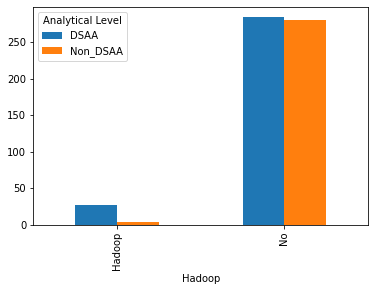

In [48]:
UKjobs.groupby('Analytical Level')['Hadoop'].value_counts().unstack(0).plot.bar()

### Communication

In [49]:
Communication='Communication Skills|Communication|Communication skills| communication skills'
UKjobs['Communication'] = UKjobs['description'].str.contains(Communication)

mask = UKjobs.applymap(type) != bool
d = {True: 'Communication', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Communication','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Communication Analytical Level                                               
Communication DSAA               40.0  53625.000000  15441.681023  25000.0   
              Non_DSAA           51.0  45418.921569  18654.738254  18000.0   
No            DSAA              271.0  60382.634686  19374.832873  22000.0   
              Non_DSAA          233.0  56662.729614  24709.911194  10000.0   

                                    25%      50%      75%       max  
Communication Analytical Level                                       
Communication DSAA              40000.0  50000.0  60000.0   90000.0  
              Non_DSAA          35000.0  40000.0  52500.0  100000.0  
No            DSAA              45000.0  60000.0  70000.0  150000.0  
              Non_DSAA          40000.0  50000.0  70000.0  150000.0

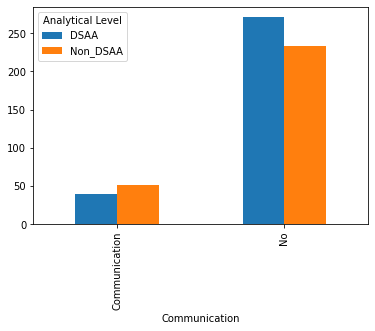

In [50]:
UKjobs.groupby('Analytical Level')['Communication'].value_counts().unstack(0).plot.bar()

### Java

In [51]:

Java='Java|java|JavaScript|javascript'
UKjobs['Java'] = UKjobs['description'].str.contains(Java)

mask = UKjobs.applymap(type) != bool
d = {True: 'Java', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Java','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Java Analytical Level                                                        
Java DSAA               48.0  59395.833333  17902.501410  23000.0  50000.0   
     Non_DSAA           41.0  52853.658537  22629.141583  18000.0  35000.0   
No   DSAA              263.0  59534.958175  19259.231920  22000.0  45000.0   
     Non_DSAA          243.0  54945.600823  24368.686313  10000.0  40000.0   

                           50%      75%       max  
Java Analytical Level                              
Java DSAA              57500.0  75000.0  110000.0  
     Non_DSAA          50000.0  70000.0  100000.0  
No   DSAA              60000.0  70000.0  150000.0  
     Non_DSAA          50000.0  65000.0  150000.0

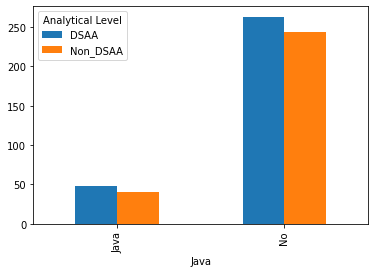

In [52]:
UKjobs.groupby('Analytical Level')['Java'].value_counts().unstack(0).plot.bar()

### Scala

In [53]:
Scala='Scala|scala'
UKjobs['Scala'] = UKjobs['description'].str.contains(Scala)

mask = UKjobs.applymap(type) != bool
d = {True: 'Scala', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Scala','Analytical Level'])['salary'].describe()

count          mean           std      min      25%  \
Scala Analytical Level                                                        
No    DSAA              243.0  57487.201646  17758.543782  22000.0  45000.0   
      Non_DSAA          259.0  53474.057915  24013.658337  10000.0  40000.0   
Scala DSAA               68.0  66754.470588  21635.777327  30000.0  50000.0   
      Non_DSAA           25.0  66760.000000  21930.344275  40000.0  50000.0   

                            50%      75%       max  
Scala Analytical Level                              
No    DSAA              60000.0  70000.0  120000.0  
      Non_DSAA          50000.0  65000.0  150000.0  
Scala DSAA              62500.0  75000.0  150000.0  
      Non_DSAA          60000.0  81000.0  130000.0

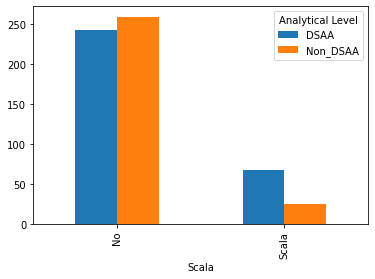

In [54]:
UKjobs.groupby('Analytical Level')['Scala'].value_counts().unstack(0).plot.bar()

### Big Data

In [58]:
Big_Data='Big Data|big data |big Data|Big data'
UKjobs['Big_Data'] = UKjobs['description'].str.contains(Big_Data)

mask = UKjobs.applymap(type) != bool
d = {True: 'Big_Data', False: 'No'}

UKjobs = UKjobs.where(mask, UKjobs.replace(d))

UKjobs.groupby(['Big_Data','Analytical Level'])['salary'].describe()

count          mean           std      min  \
Big_Data Analytical Level                                               
Big_Data DSAA               58.0  68133.689655  20666.912231  25000.0   
         Non_DSAA           20.0  50900.000000  20809.663747  25000.0   
No       DSAA              253.0  57537.312253  18104.741812  22000.0   
         Non_DSAA          264.0  54927.200758  24340.336825  10000.0   

                               25%      50%      75%       max  
Big_Data Analytical Level                                       
Big_Data DSAA              56250.0  65000.0  80000.0  125000.0  
         Non_DSAA          39500.0  47500.0  65000.0   95000.0  
No       DSAA              45000.0  55000.0  70000.0  150000.0  
         Non_DSAA          40000.0  50000.0  66250.0  150000.0

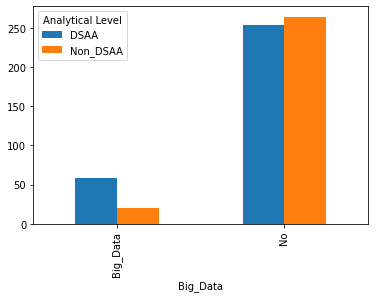

In [59]:
UKjobs.groupby('Analytical Level')['Big_Data'].value_counts().unstack(0).plot.bar()

### The popularity of data skills 

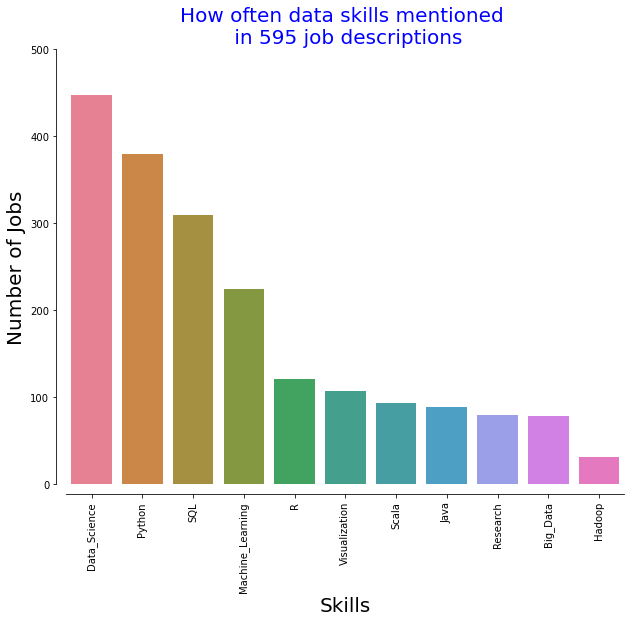

In [70]:
# count number of jobs mentioned top analytical skills 
df = pd.melt(UKjobs[['Scala','Python','Data_Science','Machine_Learning','SQL','Hadoop','Visualization','Research','Java','R','Big_Data']])
df2=df.loc[df['value']!="No"]

fig, ax = plt.subplots(1, figsize=(10,8))
ax=sns.countplot(data=df2, x='variable',order = df2['variable'].value_counts().index,palette='husl')

ax.set_ylim([0, 500])
ax.set_ylabel("Number of Jobs", fontsize=20)
ax.set_xlabel("Skills", fontsize=20)
ax.set_title("How often data skills mentioned \n in 595 job descriptions", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.xticks(rotation=90)
plt.savefig('Figure/Skill.jpg')

In [65]:
skill=df2['variable'].value_counts()
skill

Data_Science        448
Python              380
SQL                 310
Machine_Learning    224
R                   121
Visualization       107
Scala                93
Java                 89
Research             80
Big_Data             78
Hadoop               31
Name: variable, dtype: int64

In [52]:
skill_percentage=skill.multiply(other = 100/595)
skill_percentage

Data_Science        75.294118
Python              63.865546
SQL                 52.100840
Machine_Learning    37.647059
R                   20.336134
Visualization       17.983193
Scala               15.630252
Java                14.957983
Research            13.445378
Hadoop               5.210084
Name: variable, dtype: float64

### The popularity of data skills segmented by Analytical Levels

In [72]:
df = pd.melt(UKjobs[['Scala','Python','Data_Science','Machine_Learning','SQL','Hadoop','Visualization','Research','Java','Analytical Level','R']],id_vars='Analytical Level')
df2=df.loc[df['value']!="No"]
df2.head()


,Analytical Level,variable,value
53,DSAA,Scala,Scala
92,DSAA,Scala,Scala
106,DSAA,Scala,Scala
133,DSAA,Scala,Scala
134,DSAA,Scala,Scala


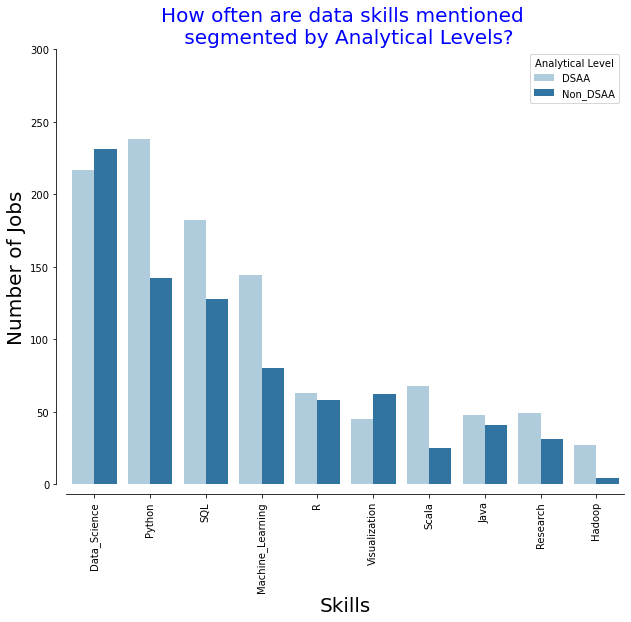

In [73]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax=sns.countplot(data=df2, x='variable',hue='Analytical Level',order = df2['variable'].value_counts().index,palette='Paired')

ax.set_ylim([0, 300])
ax.set_ylabel("Number of Jobs", fontsize=20)
ax.set_xlabel("Skills", fontsize=20)
ax.set_title("How often are data skills mentioned \n segmented by Analytical Levels?", fontsize=20, color='Blue')

sns.despine(offset=10)
plt.xticks(rotation=90)
plt.savefig('Figure/Skill_Analytical_Level.jpg')
plt.show()

In [63]:
df2.groupby('Analytical Level')['variable'].value_counts()

Analytical Level  variable        
DSAA              Python              238
                  Data_Science        217
                  SQL                 182
                  Machine_Learning    144
                  Scala                68
                  R                    63
                  Research             49
                  Java                 48
                  Visualization        45
                  Hadoop               27
Non_DSAA          Data_Science        231
                  Python              142
                  SQL                 128
                  Machine_Learning     80
                  Visualization        62
                  R                    58
                  Java                 41
                  Research             31
                  Scala                25
                  Hadoop                4
Name: variable, dtype: int64